<a href="https://colab.research.google.com/github/esn73/lab_python/blob/master/09_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이진 분류(Binary Class Classifiaction)

* scikit-learn 패캐지의 breast cancer 예제 데이터 셋을 로딩.
* 악성종양(malignant)/양성종양(benign) : 진짜 암/암이 아닌 종양을 분류하는 이진 분류 문제.
* 3가지 머신 러닝 분류 모델을 비교
    * KNN
    * Logistic Regression
    * SGD

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Breast cancer datasets 준비

In [102]:
cancer = load_breast_cancer()

In [103]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [104]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [105]:
# 특성 행렬(2차원 배열, 타겟 배열)
X, y = cancer['data'], cancer['target']

In [106]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [107]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [108]:
X.shape, y.shape

((569, 30), (569,))

In [109]:
np.unique(y, return_counts=True)

(array([0, 1]), array([212, 357]))

In [110]:
X[:3, :]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [111]:
y[-10:] # 끝에서 10개

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1])

## 훈련 셋, 테스트 셋 분리

층화 추출(stratifield sampling)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [113]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [114]:
y_train.shape, y_test.shape

((455,), (114,))

In [115]:
print('Train target:', np.unique(y_train, return_counts=True))
print('Test target:', np.unique(y_test, return_counts=True))

Train target: (array([0, 1]), array([170, 285]))
Test target: (array([0, 1]), array([42, 72]))


## KNN Classfier

In [116]:
# KNN Classifier 모델생성
# scaler = StandardScaler()
# clf = KNeighborsClassifier()
knn_model = Pipeline(steps=[('scaler', StandardScaler()), # 리스트
                            ('clf', KNeighborsClassifier())])  # 튜플들의 리스트
                            # StandardScaler 거리기반의 함수 ()^2

In [117]:
knn_model.fit(X_train, y_train) # 모델 훈련

Pipeline(steps=[('scaler', StandardScaler()), ('clf', KNeighborsClassifier())])

In [118]:
# 훈련 셋 예측 값
knn_train_pred = knn_model.predict(X_train)

In [119]:
knn_train_pred[:10]

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [120]:
confusion_matrix(y_train, knn_train_pred)

array([[161,   9],
       [  3, 282]])

In [121]:
# 정확도 : 전체 샘플 중에서 양성(암)과  음성(단순 종양)을 정확히 분류한 비율
(161 + 282) / (161 + 9 + 3 + 282) # (TP + TN) / (TP + FN + FP + TN)

0.9736263736263736

In [122]:
accuracy_score(y_train, knn_train_pred)

0.9736263736263736

In [123]:
# 정밀도: 양성(Positive=1) 예측들 중에서 정답의 비율. 
# -> 일방 종양으로 예측한 것들 중에서 진짜 일반 종양들의 비율
282 / (9 + 282) # TP / (TP + FP)

0.9690721649484536

In [124]:
# 재현율: 실제 양성(Positive=1) 예측들 중에서 정답 비율.
# -> 실제로 일반 종양들 중에서 진짜 일반 종양들의 비율.
282 / (282 + 3 ) # TP / (TP + FN)

0.9894736842105263

In [125]:
recall_score(y_train, knn_train_pred)

0.9894736842105263

In [126]:
print(classification_report(y_train, knn_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       170
           1       0.97      0.99      0.98       285

    accuracy                           0.97       455
   macro avg       0.98      0.97      0.97       455
weighted avg       0.97      0.97      0.97       455



In [127]:
# 암의 정밀도: 암으로 예측한 샘플들 중에서 정답 비율
161 / (161  + 3)

0.9817073170731707

In [128]:
precision_score(y_train, knn_train_pred, pos_label=0)

0.9817073170731707

In [129]:
# 암의 재현율: 실제 암 샘플들 중에서 정답 비율.
161 / (161 + 9)

0.9470588235294117

In [130]:
recall_score(y_train, knn_train_pred, pos_label=0)

0.9470588235294117

In [131]:
# 암의 F1 score
2 / (1/0.98 + 1/0.95)

0.9647668393782384

In [132]:
# 테스트 셋 예측값
knn_test_pred = knn_model.predict(X_test)
print(knn_test_pred)

[0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1
 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0
 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1
 0 1 1]


In [133]:
# 테스트 셋 실젯값
print(y_test)

[0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1
 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0
 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1
 0 1 1]


In [134]:
confusion_matrix(y_test, knn_test_pred)

array([[39,  3],
       [ 2, 70]])

In [135]:
print(classification_report(y_test, knn_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [136]:
# recall  실제 암 재현율
39 / (39 + 3)

0.9285714285714286

In [137]:
# precision  암 정밀도
39 / (39 + 2)

0.9512195121951219

In [138]:
# 정확도 accuracy 위 수치랑 비교
(39 + 70) / (39 + 3 + 2 + 70)

0.956140350877193

**ROC(Recevier Operating Characterlistic) Curve**

가짜 양성 비율(FPR: False Positive Rate)에 대한 진짜 양성 비율(TRP:True Positive Rate)의 곡선. FRP을 x축에, TRP을 y축에 그린 곡선.

 * __특이도(spercificity)__: 가짜 양성 비율(__FPR__). 실제 음성 샘플들 중에서 양성으로 잘 못 예측한 비율. FP / (FP + TN)
 *__민감도(senstivity)__: 진짜 양성 비율(__TPR__). 실제 양성 샘플들 중에서 양성으로 맞게 예측한 비율. __재현율(racall)__. TP / (TP + FN)
 * __AUC__(Area Under Curver): ROC 곡선의 아래쪽 넓이.
    * AUC가 1에 가까울 수록 좋은 분류 모델.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


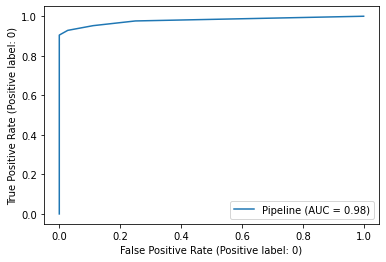

In [139]:
# 암(Maligmant)을 양성(Positive)으로 생각한 특이도/민감도 관계 그래프(ROC curve)
plot_roc_curve(estimator=knn_model, X=X_test, y=y_test, pos_label=0)

In [140]:
# Logistic Regression 모델 생성
scaler = StandardScaler()
clf = LogisticRegression()
logit_model = Pipeline(steps=[('scaler', scaler), ('clf', clf)])

In [141]:
logit_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', LogisticRegression())])

In [142]:
logit_train_pred = logit_model.predict(X_train) # 훈련 셋 예측값

In [143]:
confusion_matrix(y_train, logit_train_pred)

array([[166,   4],
       [  1, 284]])

In [144]:
logit_test_pred = logit_model.predict(X_test)   # 테스트 셋 예측값

In [145]:
print(logit_test_pred)

[0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1
 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0
 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1
 0 1 1]


In [146]:
confusion_matrix(y_test, logit_test_pred)

array([[41,  1],
       [ 1, 71]])

In [147]:
logit_model.predict_log_proba(X_test)

array([[-6.00504257e-08, -1.66280812e+01],
       [-1.13755812e+01, -1.14722965e-05],
       [-6.43178264e-03, -5.04971771e+00],
       [-7.67302776e-01, -6.24113038e-01],
       [-6.68694322e-10, -2.11256940e+01],
       [-4.83341671e+00, -7.99112434e-03],
       [-1.09458688e+01, -1.76308563e-05],
       [-5.83013903e-07, -1.43550551e+01],
       [-5.49050994e-05, -9.80993178e+00],
       [-8.12727663e-11, -2.32332097e+01],
       [-4.52449061e+00, -1.08994184e-02],
       [-1.34102498e-03, -6.61499148e+00],
       [-6.64131710e+00, -1.30615955e-03],
       [-2.65193883e-05, -1.05376477e+01],
       [-2.78702308e-04, -8.18550569e+00],
       [-2.32733046e+00, -1.02648451e-01],
       [-4.53068030e-01, -1.00970864e+00],
       [-1.79158356e+00, -1.82356742e-01],
       [-1.02913102e+01, -3.39272100e-05],
       [-4.06954402e+00, -1.72328128e-02],
       [-1.67674230e-03, -6.39174073e+00],
       [-5.36987449e-02, -2.95109488e+00],
       [-8.53779066e+00, -1.95941838e-04],
       [-7.

In [148]:
print(classification_report(y_test, logit_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [149]:
# SGD(Stochastic Gradient Descent, 확률적 경사 하강법) 모델 생성
sgd_reg = SGDRegressor()

In [150]:
sgd_reg.fit(X_train, y_train)   # 모델 훈련

SGDRegressor()

In [151]:
print(sgd_reg.intercept_)
print(sgd_reg.coef_)

[-4.08898819e+09]
[-4.64652349e+10  7.35073177e+10 -3.97334785e+11 -1.59389566e+12
 -1.00410743e+09 -1.69066149e+09 -1.24146743e+10 -1.39996708e+09
 -3.39300933e+09 -8.50624496e+08 -2.04435018e+09 -9.74320582e+10
 -4.26462163e+08 -1.36154826e+12 -1.49532323e+08 -2.38020922e+09
 -9.55680940e+09 -9.20833711e+08 -2.21491891e+09 -2.98430131e+08
 -1.23066492e+11 -2.76903648e+10  1.36616091e+11 -5.69822092e+11
 -2.19791944e+09 -4.35262813e+09 -3.18195961e+10 -6.48598071e+09
 -1.04512356e+10 -1.56820944e+08]


In [152]:
sgd_train_pred = sgd_reg.predict(X_train)   # 예측값
print(sgd_train_pred[:10])

[-7.72444802e+14 -2.94285966e+15 -8.38158047e+14 -1.33791093e+15
 -9.36149668e+14 -1.64053350e+15 -1.50085399e+15 -6.78871745e+14
 -5.83427200e+14 -1.61670888e+15]


In [153]:
print(y_train[:10])

[1 0 1 1 1 1 1 1 1 1]


In [154]:
# 훈련 셋 평가
print('RMSE:', np.sqrt(mean_squared_error(y_train, sgd_train_pred)))
print('R^2:',r2_score(y_train, sgd_train_pred))

RMSE: 1845113134709492.0
R^2: -1.4547052722324805e+31


# 다중 클래스 분류(Multi-class Classfication)

* scikit-learn 패키지의 iris 예제 데이터 셋을 로딩.
* setosa/versicolor/virginica: 3개 클래스를 갖는 분류 문제.
* 3가지 머신 러닝 분류 모델 비교

In [155]:
from sklearn.datasets import load_iris

In [156]:
iris = load_iris(as_frame=True) 

In [157]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [158]:
X, y = iris['data'], iris['target']

In [159]:
X.shape, y.shape

((150, 4), (150,))

In [160]:
X, y = load_iris(return_X_y=True)

In [161]:
iris2 = load_iris(as_frame=True) 

In [162]:
df = iris2['data']  #  키 target은  pandas.DataFrame 에 저장
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [163]:
df['species'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [164]:
for i, v in enumerate(iris2['target_names']):
    df.loc[df['species'] == i, 'species'] = v
    # df[df :, 4]==i 로 써야함 배열일때

In [165]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [166]:
df.iloc[:, 4].values

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [167]:
# 훈련/테스트 셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                            stratify=y,
                                                            random_state=42)

In [168]:
 X_train.shape, X_test.shape

((120, 4), (30, 4))

In [169]:
y_train.shape, y_test.shape

((120,), (30,))

In [170]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([10, 10, 10]))

In [171]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([40, 40, 40]))

In [172]:
# KNN
scaler = StandardScaler()
clf = KNeighborsClassifier()
knn_model = Pipeline(steps=[('scaler', scaler),
                            ('clf', clf)]) # 모델 생성

In [173]:
knn_model.fit(X_train, y_train) # 모델 훈련

Pipeline(steps=[('scaler', StandardScaler()), ('clf', KNeighborsClassifier())])

In [174]:
knn_train_pred = knn_model.predict(X_train)
print(knn_train_pred)

[0 1 1 0 1 2 1 2 2 2 2 1 1 1 1 0 0 2 2 0 1 0 2 0 1 2 2 0 2 0 0 1 1 0 2 2 1
 1 2 1 0 1 0 2 0 0 2 0 0 0 0 1 2 1 0 2 1 2 0 2 0 1 2 0 2 1 2 1 1 2 0 0 0 1
 1 2 1 2 2 1 0 2 1 0 2 0 2 1 1 0 1 2 0 0 2 2 2 1 2 0 2 1 2 2 0 1 1 1 1 1 0
 2 1 1 0 0 0 0 1 0]


In [175]:
print(y_train)

[0 2 1 0 1 2 1 2 2 2 2 1 1 1 1 0 0 2 2 0 1 0 2 0 1 2 2 0 2 0 0 1 1 0 2 2 1
 1 2 1 0 1 0 2 0 0 2 0 0 0 0 1 2 1 0 2 1 2 0 2 0 1 2 0 1 1 2 1 1 2 0 0 0 2
 1 2 1 2 2 1 0 2 1 0 2 0 2 1 1 0 1 2 0 0 2 2 2 1 2 0 2 1 2 2 0 1 1 1 1 1 0
 2 1 1 0 0 0 0 1 0]


In [176]:
confusion_matrix(y_train, knn_train_pred)

array([[40,  0,  0],
       [ 0, 39,  1],
       [ 0,  2, 38]])

In [177]:
print(classification_report(y_train, knn_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.95      0.97      0.96        40
           2       0.97      0.95      0.96        40

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [178]:
knn_test_pred = knn_model.predict(X_test)
print(knn_test_pred)

[0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 1 0 2 1 1 2 1 1 0 2 0]


In [179]:
confusion_matrix(y_test, knn_test_pred)

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  2,  8]])

In [180]:
print(classification_report(y_test, knn_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [181]:
# Logistic Regression
scaler = StandardScaler()
clf = LogisticRegression()
logit_model = Pipeline(steps=[('scaler', scaler), ('clf', clf)])

In [182]:
logit_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', LogisticRegression())])

In [183]:
logit_train_pred = logit_model.predict(X_train) # 훈련 셋 예측값

In [184]:
confusion_matrix(y_train, logit_train_pred)

array([[40,  0,  0],
       [ 0, 38,  2],
       [ 0,  3, 37]])

In [185]:
logit_test_pred = logit_model.predict(X_test)   # 테스트 셋 예측값

In [186]:
print(logit_test_pred)

[0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 1 2 2 1 0 2 0]


In [187]:
confusion_matrix(y_test, logit_test_pred)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  9]])

In [188]:
logit_model.predict_proba(X_test)

array([[9.78753990e-01, 2.12456454e-02, 3.64296803e-07],
       [3.80579668e-03, 3.69201413e-01, 6.26992790e-01],
       [1.48846239e-01, 8.42428824e-01, 8.72493791e-03],
       [9.54935228e-02, 8.94569776e-01, 9.93670125e-03],
       [9.88454327e-01, 1.15455002e-02, 1.72789643e-07],
       [1.80683453e-02, 6.75567366e-01, 3.06364289e-01],
       [9.96214377e-01, 3.78559301e-03, 2.97470734e-08],
       [9.40863018e-01, 5.91356811e-02, 1.30095368e-06],
       [4.12846355e-04, 1.43855709e-01, 8.55731445e-01],
       [6.00204723e-02, 7.37086410e-01, 2.02893118e-01],
       [1.76273019e-05, 8.49724424e-02, 9.15009930e-01],
       [7.25584839e-05, 5.20543830e-02, 9.47873058e-01],
       [4.25354238e-05, 3.21406885e-02, 9.67816776e-01],
       [1.71581212e-02, 7.89399458e-01, 1.93442421e-01],
       [9.76436184e-01, 2.35634162e-02, 4.00235175e-07],
       [9.70825860e-01, 2.91736726e-02, 4.67905359e-07],
       [9.86646560e-01, 1.33533346e-02, 1.05182502e-07],
       [3.01161670e-02, 9.39671

In [189]:
# SGD
scaler = StandardScaler()
clf = SGDClassifier(loss='log', random_state=42)
sgd_model = Pipeline(steps=[('scaler', scaler), ('clf', clf)])

In [190]:
sgd_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', SGDClassifier(loss='log', random_state=42))])

In [191]:
print(sgd_model.named_steps['clf'].intercept_)  # 절편
print(sgd_model.named_steps['clf'].coef_)   # 계수들

[ -9.35695322  -3.99406717 -30.60843179]
[[ -6.05974829   4.85067798  -6.37800506  -5.05768464]
 [ -4.99016674  -1.1102307    7.85972914  -8.44082771]
 [ -2.88941953 -10.21912644  27.50091765  29.83116113]]


In [192]:
sgd_train_pred = sgd_model.predict(X_train) # 훈련 셋의 예측값

In [193]:
sgd_train_prob = sgd_model.predict_proba(X_train)
sgd_train_prob[:5]

array([[5.00962089e-01, 4.99037911e-01, 6.67758960e-44],
       [3.20147574e-07, 4.03446373e-01, 5.96553307e-01],
       [2.99762086e-09, 1.03589357e-01, 8.96410640e-01],
       [5.06483354e-01, 4.93516646e-01, 1.16193159e-47],
       [1.75687018e-06, 9.99796377e-01, 2.01865780e-04]])

In [194]:
confusion_matrix(y_train, sgd_train_pred)

array([[40,  0,  0],
       [ 0, 32,  8],
       [ 0,  0, 40]])

In [195]:
sgd_test_pred = sgd_model.predict(X_test)  

In [196]:
print(sgd_test_pred)

[0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 2 1 0 2 0]


In [197]:
sgd_test_prob = sgd_model.predict_proba(X_test)

In [198]:
sgd_test_prob[:5, :]

array([[5.01923927e-01, 4.98076073e-01, 1.42443040e-45],
       [2.50042609e-09, 9.25727042e-04, 9.99074270e-01],
       [1.52315986e-03, 9.98476840e-01, 7.74817715e-13],
       [2.53309529e-04, 9.99746690e-01, 5.48625616e-12],
       [5.03155164e-01, 4.96844836e-01, 1.47035609e-47]])

In [199]:
confusion_matrix(y_test, sgd_test_pred)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]])